In [1]:
%cd AtomicImageSimulator/
from main import *

import numpy as np
import os, re
import sys
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle
import atomai as aoi
np.random.seed(0)
from processing import *

import torch
torch.set_default_device("cuda")

/lustre/saranath/Techcon24/AIMD/Sim2Experiment/AtomicImageSimulator


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
directory = "/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/"

ind_to_val, image_list, mask_list, label_list = xdatcar_processor(directory, n_sims=25)

{0: '5', 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '

{0: '5', 1: '25', 2: '20', 3: '14', 4: '23', 5: '19', 6: '6', 7: '15', 8: '22', 9: '13', 10: '10', 11: '7', 12: '8', 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '23', 5: '19', 6: '6', 7: '15', 8: '22', 9: '13', 10: '10', 11: '7', 12: '8', 13: '12', 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '23', 5: '19', 6: '6', 7: '15', 8: '22', 9: '13', 10: '10', 11: '7', 12: '8', 13: '12', 14: '17', 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '23', 5: '19', 6: '6', 7: '15', 8: '22', 9: '13', 10: '10', 11: '7', 12: '8', 13: '12', 14: '17', 15: '2', 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '23', 5: '19',

Text(0.5, 1.0, 'Mask_S_XDATCAR_df_S_23')

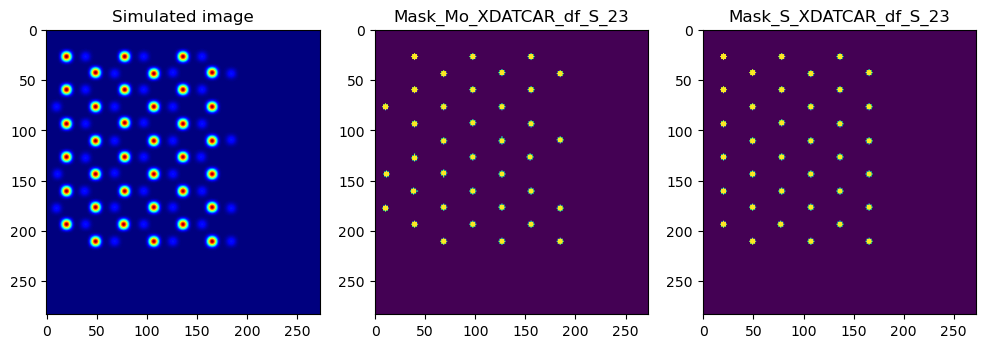

In [3]:
#plot image from the lists of image-mask pairs
temp_id = 4
_, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(image_list[temp_id][1], cmap = 'jet')
ax2.imshow(mask_list[temp_id][1][:,:,0])
ax3.imshow(mask_list[temp_id][1][:,:,1])
ax1.set_title("Simulated image")
ax2.set_title("Mask_Mo_" + label_list[temp_id])
ax3.set_title("Mask_S_" + label_list[temp_id])

In [4]:
#crop out the empty spaces
cropped_image_list = []
cropped_mask_list = []

for i in range(0,len(image_list)):
  local_cropped_imglist = []
  local_cropped_masklist = []
  for j in range(0,len(image_list[i])):
    local_cropped_imglist.append(image_list[i][j][:208,0:208])
    local_cropped_masklist.append(mask_list[i][j][:208,0:208])

  cropped_image_list.append(local_cropped_imglist)
  cropped_mask_list.append(local_cropped_masklist)

print("Number of tasks : ",len(cropped_image_list))
np.shape(cropped_image_list[0])

Number of tasks :  25


(228, 208, 208)

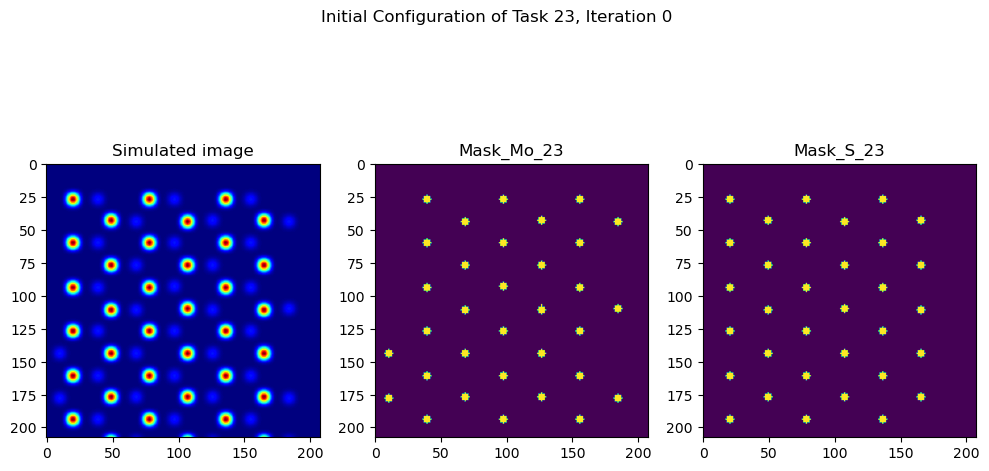

In [5]:
temp_id = 4

_, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))

ax1.imshow(cropped_image_list[temp_id][0], cmap = 'jet')
ax2.imshow(cropped_mask_list[temp_id][0][:,:,0])
ax3.imshow(cropped_mask_list[temp_id][0][:,:,1])
ax1.set_title("Simulated image")
ax2.set_title("Mask_Mo_" + ind_to_val[temp_id])
ax3.set_title("Mask_S_" + ind_to_val[temp_id])
_.suptitle(f"Initial Configuration of Task {ind_to_val[temp_id]}, Iteration 0")

plt.show()

Augmentations

In [6]:
dt = aoi.transforms.datatransform(1, # number of classes
                                  gauss_noise=[1000, 2000], # scaled values
                                  poisson_noise=[30, 45],
                                  blur=False,
                                  contrast=True,
                                  zoom=False,
                                  #resize=[2, 1], # downsize all the images by a factor of 2
                                  seed=1)
def augmented_simulations(cropped_image_list,cropped_mask_list):
    X_train, y_train = dt.run(np.array(cropped_image_list), np.array(cropped_mask_list)[..., None])
    return X_train, y_train

In [7]:
image_mask = {val:(None,None) for val in range(25)}

for val in range(25):
    image_mask[val] = augmented_simulations(cropped_image_list[val],cropped_mask_list[val])

Augmented Structures

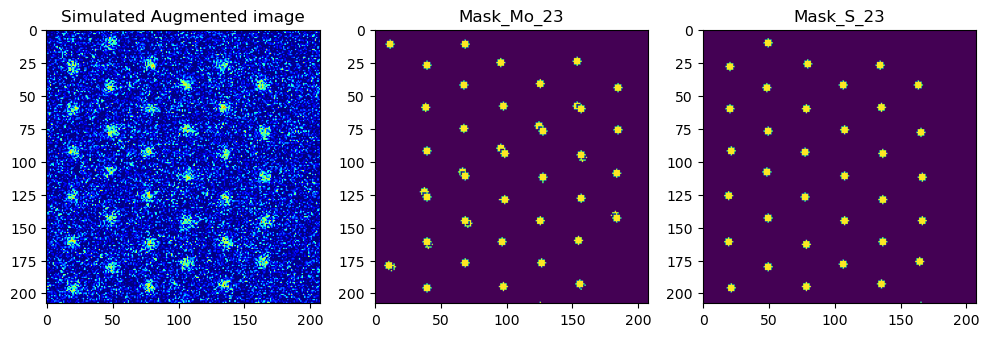

In [8]:

temp_id = 4
_, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(image_mask[temp_id][0][30].reshape(208,208), cmap = 'jet')
ax2.imshow(image_mask[temp_id][1][30][:,:,0])
ax3.imshow(image_mask[temp_id][1][30][:,:,1])
ax1.set_title("Simulated Augmented image")
ax2.set_title("Mask_Mo_" + ind_to_val[temp_id])
ax3.set_title("Mask_S_" + ind_to_val[temp_id])

#_.suptitle(f"Initial Configuration of Task {ind_to_val[temp_id]}, Iteration 10")

plt.show()

No Augmentations

In [9]:
image_nonaug = {val:(None,None) for val in range(25)}

for val in range(25):
    s1, s2, s3 = np.array(cropped_image_list[val]).shape
    s1_, s2_, s3_, s4_ = np.array(cropped_mask_list[val]).shape
    image_nonaug[val] = np.reshape(cropped_image_list[val],(s1,1,s2,s3)), np.reshape(cropped_mask_list[val],(s1_,s2_,s3_,s4_,1))


Correlation of Aug vs No Augz


Average correlation: 0.4186244554284148
Standard deviation of correlation: 0.05812491930654429


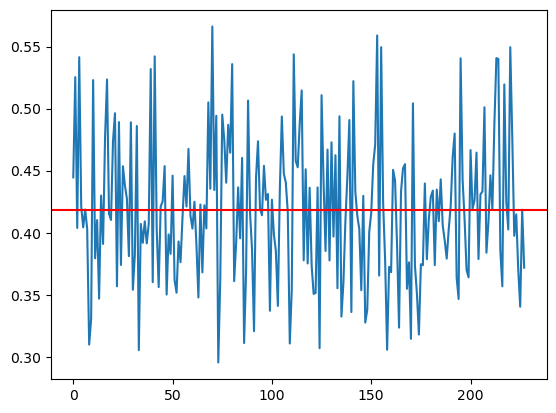

In [10]:
from scipy.stats import pearsonr

def flatten_image(image):
    return image.flatten()

def calculate_correlations(images1, images2):
    assert len(images1) == len(images2), "The datasets must have the same number of images"
    correlations = []
    for img1, img2 in zip(images1, images2):
        flat_img1 = flatten_image(img1)
        flat_img2 = flatten_image(img2)
        correlation, _ = pearsonr(flat_img1, flat_img2)
        correlations.append(correlation)
    return correlations

images1 = image_mask[0][0]
images2 = image_nonaug[0][0]
correlations = calculate_correlations(images1, images2)

print(f'Average correlation: {np.mean(correlations)}')
print(f'Standard deviation of correlation: {np.std(correlations)}')
plt.plot(correlations)
plt.axhline(np.mean(correlations),c='r')

Diversity of the data

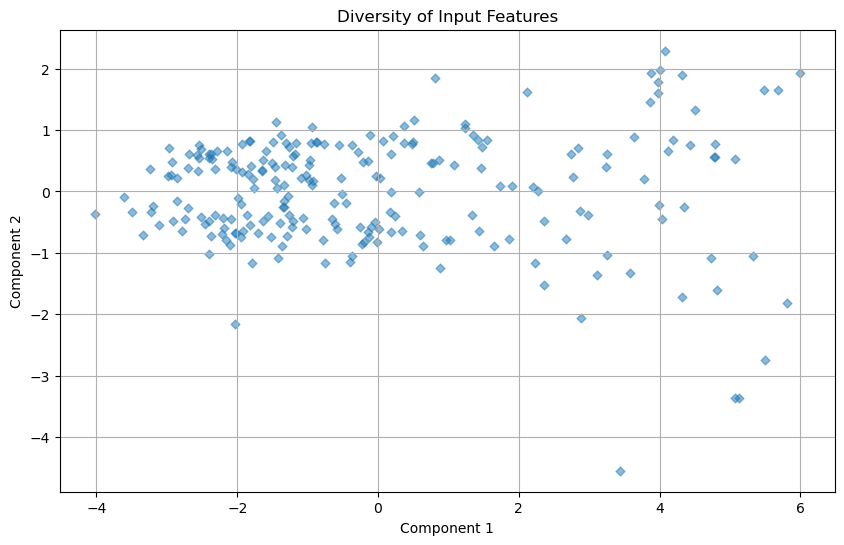

In [11]:
import os
import cv2
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(images, n_components=2):
    # Perform PCA
    flat_images = images.reshape(images.shape[0], -1)
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(flat_images)
    
    # Plot the PCA results
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_results[:, 0], pca_results[:, 1], s=20, alpha=0.5, marker="D")
    plt.title('Diversity of Input Features')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()



def plot_tsne(images, n_samples=1000, perplexity=30, learning_rate=200):
    # Flatten the images
    flat_images = images.reshape(images.shape[0], -1)
    
    # Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate)
    tsne_results = tsne.fit_transform(flat_images[:n_samples])
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=2, alpha=0.5)
    plt.title('t-SNE of Image Dataset')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True)
    plt.show()

# Example usage
images = image_mask[0][0]

# Plot the t-SNE visualization
#plot_tsne(images)

# Plot the PCA visualization
plot_pca(images)



In [12]:
val = 0
energy_to_ind = {val:None for val in range(25)}
directory =  f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/"
for filename in os.listdir(directory):
  if "." in filename:
    continue
  task = ind_to_val[val]
  file_name = directory + filename + "/"
  print(val)
  # filepath = f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/df_{task}/"
  xdatcar_filepath = f"XDATCAR_df_S_{filename.split('_')[1]}"
  oszicar_filepath = f"OSZICAR_df_S_{filename.split('_')[1]}"
  print(file_name)
  energy_to_ind[val] = oszicar_generation(file_name,xdatcar_filepath,oszicar_filepath,filename.split("_")[1])
  energy_to_ind[val]["target_total_energy_per_atom"] = energy_to_ind[val]["target_total_energy_per_atom"] - energy_to_ind[val]["target_total_energy_per_atom"].mean()
  val += 1

0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_5/
Total number of atoms: 103
Last trajectory Number: 2280.0
1
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_25/
Total number of atoms: 83
Last trajectory Number: 2420.0
2
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_20/
Total number of atoms: 88
Last trajectory Number: 2480.0
3
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_14/
Total number of atoms: 94
Last trajectory Number: 2380.0
4
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_23/
Total number of atoms: 85
Last trajectory Number: 2400.0
5
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_19/
Total number of atoms: 89
Last trajectory Number: 2460.0
6
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_6/
Total number of atoms: 102
Last trajectory Number: 2150.0
7
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/

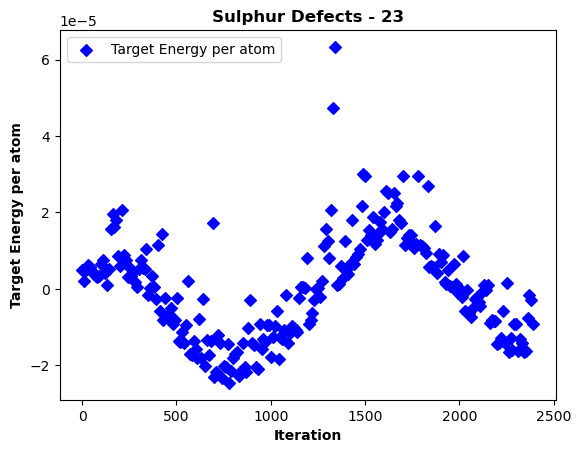

In [13]:
plt.scatter(energy_to_ind[4]['Iteration'], energy_to_ind[4]['target_total_energy_per_atom'], label='Target Energy per atom', color='blue', marker='D')

# Adding labels and title with font settings
plt.xlabel('Iteration', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.ylabel('Target Energy per atom', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.title(f'Sulphur Defects - {ind_to_val[4]}', fontdict={'fontsize': 12, 'fontweight': 'bold'})

plt.legend()

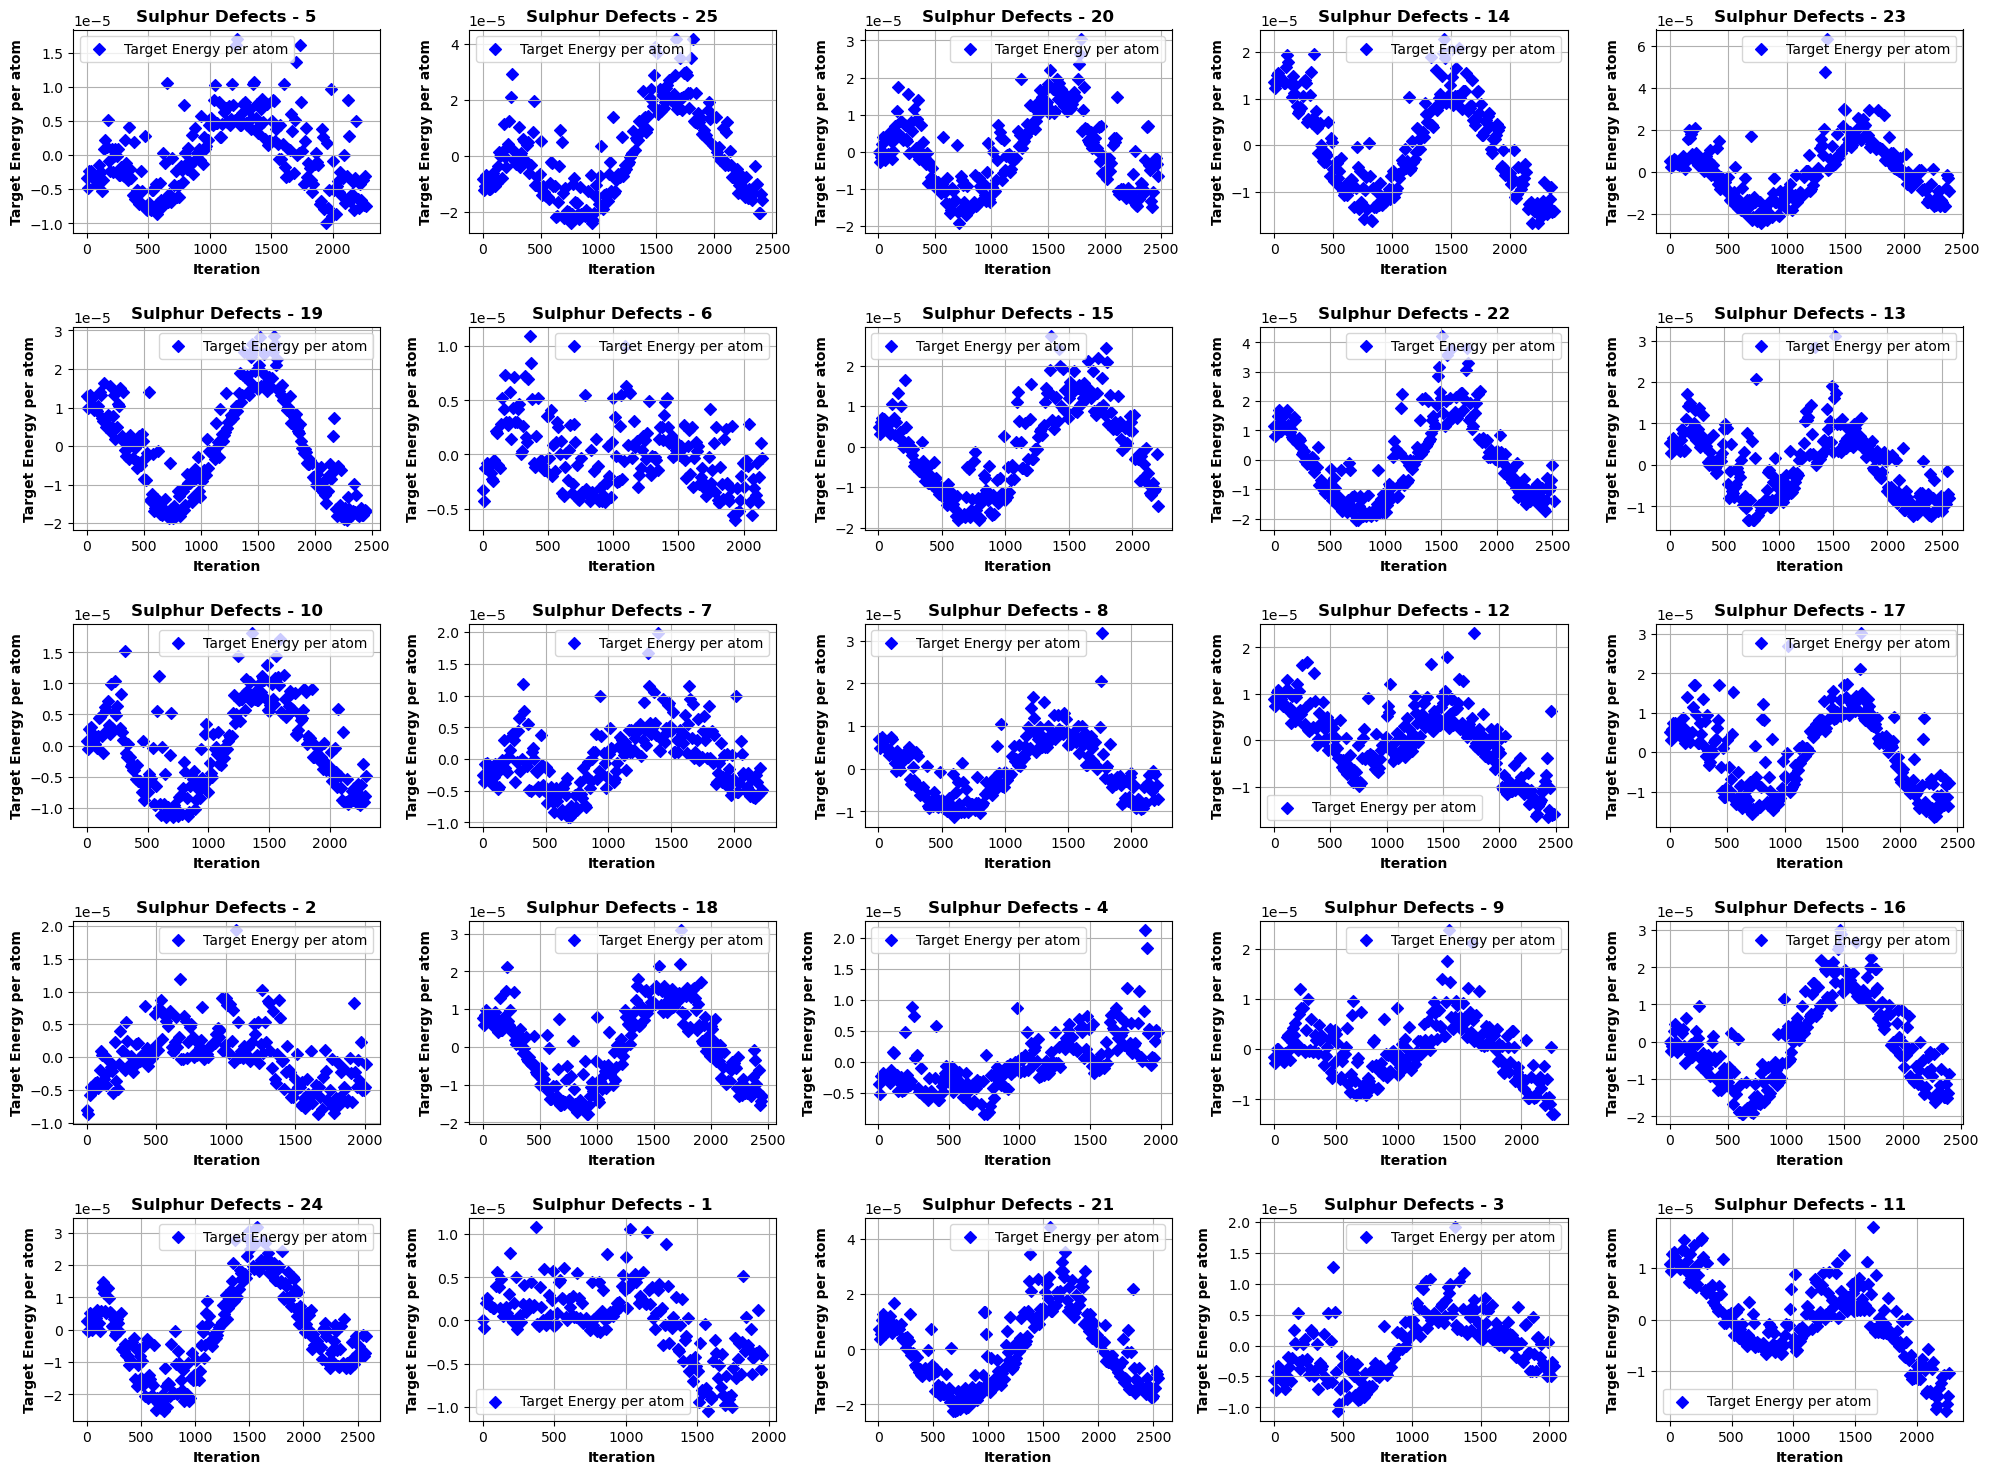

In [14]:
# Create a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 15), dpi=100)

# Flatten the 2D array of axes to easily iterate over them
axs = axs.flatten()

# Loop through each task and its corresponding subplot
for i in range(25):
    ax = axs[i]
    ax.scatter(energy_to_ind[i]['Iteration'], energy_to_ind[i]['target_total_energy_per_atom'], label='Target Energy per atom', color='blue', marker='D')
    
    # Adding labels and title with font settings
    ax.set_xlabel('Iteration', fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.set_ylabel('Target Energy per atom', fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.set_title(f'Sulphur Defects - {ind_to_val[i]}', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Full Training - Individual Tasks

In [19]:
def color_gradient_difference_plot_modified(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))
 
    # Scatter plot for training data
    scatter_train = ax1.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=60, cmap='viridis', edgecolor='k', alpha=0.75, marker='D')
    cbar_train = plt.colorbar(scatter_train, ax=ax1)
    cbar_train.set_label('Training Error (meV)', fontsize=14, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=14, width=2)

    ax1.set_xlabel("Computed energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax1.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax1.set_title("Training Prediction Error", fontsize=18, fontweight='bold')
    ax1.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax1.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.tick_params(axis='both', which='major', labelsize=14, width=2)

    # Scatter plot for prediction data
    scatter_pred = ax2.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=60, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax2)
    cbar_pred.set_label('Testing Error (meV)', fontsize=14, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=14, width=2)

    ax2.set_xlabel("Computed energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax2.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax2.set_title("Testing Prediction Error", fontsize=18, fontweight='bold')
    ax2.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax2.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.tick_params(axis='both', which='major', labelsize=14, width=2)

    plt.suptitle(f"Energy Difference Gradient for Task {task}", fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/gradient_plot/Gradient_plot_Task{task}_{feature_extractor}_{pois}_aug{augmentation}.png")
    plt.clf()
def color_gradient_difference_plot_combined(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for training data
    scatter_train = ax.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=60, cmap='viridis', edgecolor='k', alpha=0.75, marker='D', label='Training Data')
    cbar_train = plt.colorbar(scatter_train, ax=ax)
    cbar_train.set_label('Training Error (meV)', fontsize=14, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=14, width=2)

    # Scatter plot for testing data
    scatter_pred = ax.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=60, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^', label='Testing Data')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax)
    cbar_pred.set_label('Testing Error (meV)', fontsize=14, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=14, width=2)

    # Set labels, title, and formatting
    ax.set_xlabel("Simulated energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_title(f"Energy Difference Gradient for Task {task}", fontsize=18, fontweight='bold')
    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)
    # Restrict y-axis to a limit of 0.1
    #ax.set_ylim([-0.04*1e-3, -0.03*1e-3])

    # Add a legend
    ax.legend(fontsize=14)

    plt.tight_layout()
    plt.show()
    plt.clf()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter

def color_gradient_difference_plot_combined_with_insets(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    print(max(abs(training_pred)))
    print(mean(training_pred))
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create figure and main axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Scatter plot for training data on the main plot
    scatter_train = ax.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=40, cmap='viridis', edgecolor='k', alpha=0.6, marker='D', label='Training Data')
    cbar_train = plt.colorbar(scatter_train, ax=ax)
    cbar_train.set_label('Training Error (meV)', fontsize=8, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=8, width=2)

    # Fit line for training data on the main plot
    coeffs_train = np.polyfit(np.array(training_ground_truth).reshape(-1,), np.array(training_pred).reshape(-1,), 1)
    fit_line_train = np.polyval(coeffs_train, np.array(training_ground_truth).reshape(-1,))
    
    # Scatter plot for testing data on the main plot
    scatter_pred = ax.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=40, cmap='coolwarm', edgecolor='k', alpha=0.6, marker='^', label='Testing Data')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax)
    cbar_pred.set_label('Testing Error (meV)', fontsize=8, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=8, width=2)

    # Fit line for testing data on the main plot
    coeffs_test = np.polyfit(np.array(energy_ground_truth).reshape(-1,), np.array(predictions).reshape(-1,), 1)
    fit_line_test = np.polyval(coeffs_test, np.array(energy_ground_truth).reshape(-1,))
    

    # Set labels, title, and formatting
    ax.set_xlabel("Simulated energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_title(f"Energy Difference Gradient for Task {task}", fontsize=14, fontweight='bold')
    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=8, width=2)
    #ax.set_ylim([-0.04*1e-3, 0.03*1e-3])
    #ax.set_ylim([-0.039*1e-3, -0.038*1e-3])

    # Add a legend
    ax.legend(fontsize=10, bbox_to_anchor=(0.75, 1.08), ncol=2)

    # Inset plot for training data
    ax_inset_train = inset_axes(ax, width="40%", height="30%", loc=1, bbox_to_anchor=(0,-0.02,1,1), bbox_transform=ax.transAxes)  # loc=1 corresponds to upper right
    ax_inset_train.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=30, cmap='viridis', edgecolor='k', alpha=0.75, marker='D')
    ax_inset_train.plot(training_ground_truth, fit_line_train, color='darkmagenta',  linestyle= "-.", label='Training Fit')
    ax_inset_train.set_title("Training Data", fontsize=10)
    ax_inset_train.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_train.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_train.grid(True, linestyle='--', alpha=0.7)
    ax_inset_train.tick_params(axis='both', which='major', labelsize=7, width=1)
    ax_inset_train.legend(fontsize=5)
    #ax_inset_train.set_ylim([-0.04*1e-3, 0.03*1e-3])

    # Inset plot for testing data
    ax_inset_test = inset_axes(ax, width="40%", height="30%", loc=4, bbox_to_anchor=(0,0.02,1,1), bbox_transform=ax.transAxes)  # loc=4 corresponds to lower right
    ax_inset_test.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=30, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^')
    ax_inset_test.plot(energy_ground_truth, fit_line_test, color='tomato', linestyle="-.", label='Testing Fit')
    ax_inset_test.set_title("Testing Data", fontsize=10)
    ax_inset_test.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_test.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_test.grid(True, linestyle='--', alpha=0.7)
    ax_inset_test.tick_params(axis='both', which='major', labelsize=7, width=1)
    ax_inset_test.legend(fontsize=5)
    

    plt.tight_layout()
    plt.show()
    plt.clf()

# Example call (assuming you have the required data and function dependencies):
# color_gradient_difference_plot_combined_with_insets(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter

def plot_3d_energy_difference(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Compute the differences
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for training data
    scatter_train = ax.scatter(training_ground_truth, training_pred, difference_training,
                               c=difference_training, cmap='viridis', edgecolor='k', alpha=0.75, marker='D', label='Training Data')

    # Scatter plot for prediction data
    scatter_pred = ax.scatter(energy_ground_truth, predictions, difference_predictions,
                              c=difference_predictions, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^', label='Testing Data')

    # Adding color bar
    cbar = plt.colorbar(scatter_train, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('Energy Difference (meV)', fontsize=14, fontweight='bold')
    cbar.ax.tick_params(labelsize=14, width=2)

    # Set labels
    ax.set_xlabel("Computed Energy Difference per Atom (meV)", fontsize=10, fontweight='bold')
    ax.set_ylabel("Predicted Energy Difference per Atom (meV)", fontsize=10, fontweight='bold')
    ax.set_zlabel("Energy Difference (meV)", fontsize=10, fontweight='bold')

    ax.set_title(f"3D Energy Difference for Task {task}", fontsize=18, fontweight='bold')

    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.zaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))

    ax.tick_params(axis='both', which='major', labelsize=8, width=2)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adding legend
    ax.legend(loc='upper right', fontsize=12)

    #plt.tight_layout()
    # plt.savefig(f"/path/to/save/Gradient_plot_3D_Task{task}_{feature_extractor}_{scaler}_aug{augmentation}.png")
    plt.show()

# Example call (assuming you have the required data and function dependencies):
# plot_3d_energy_difference(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation)

# Example call (assuming you have the required data and function dependencies):
# color_gradient_difference_plot_3d(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation)



def mod_plot_training_loss(training_loss, task, scaler_flag, feature_extractor, training_cycles, lr, augmentation):
    plt.figure(figsize=(12, 8))

    # Plot the training loss with enhancements
    plt.plot(training_loss, color='darkblue', linestyle='-', marker='o', markersize=5, linewidth=2, label='Training Loss')

    # Add a title with larger, bold font
    plt.title(f"Training Loss - Task {task}", fontsize=24, fontweight='bold', color='darkblue')

    # Label x and y axes with larger, bold font
    plt.xlabel("Training Cycles", fontsize=18, fontweight='bold')
    plt.ylabel("Loss Optimization - MSE+MLL", fontsize=18, fontweight='bold')

    # Set x-axis ticks to show every training cycle, if appropriate
    plt.xticks(fontsize=14, fontweight='bold')

    # Set y-axis ticks with consistent styling
    plt.yticks(fontsize=14, fontweight='bold')

    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a legend
    plt.legend(fontsize=16, loc='best', frameon=True, shadow=True, fancybox=True)

    # Add a horizontal line at y=0 for reference
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Reference Line')

    # Optionally save the plot
    plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/training_loss/Training_loss_Task{task}_Norm{scaler_flag}_{feature_extractor}_aug{augmentation}_training{training_cycles}_lr{lr}_.png")

    plt.clf()

import numpy as np
def single_model_training_and_validation(train_tasks,ind_to_val,image_mask,energy_to_ind,title,**kwargs):
    datadim = kwargs.get("datadim", 43264)
    embedim = 2
    torch.manual_seed(2)
    np.random.seed(2)
    training_cycles = kwargs.get("training_cycles", 150)
    lr = kwargs.get("lr", 1e-2)
    scaler_flag = kwargs.get("scaler",False)
    results = {int(ind_to_val[task]):[] for task in train_tasks}
    feature_extractor = kwargs.get("reptile","default_FE")
    augmentation = kwargs.get("augmentation",True)
    print(feature_extractor)
    model_sample = torch.nn.Sequential(
                                torch.nn.Linear(datadim,2048),
                                torch.nn.ReLU(),
                                # torch.nn.Linear(10240,2048),
                                # torch.nn.ReLU(),
                                torch.nn.Linear(2048,1024),
                                torch.nn.ReLU(),
                                torch.nn.Linear(1024, 256),
                                torch.nn.ReLU(),
                                *(list(fcFeatureExtractor(256,embedim).children())),)

    model_mod = kwargs.get("model_mod",model_sample)
    

    for task in train_tasks:
        print(f"Training Task {ind_to_val[task]}")
        if task!= 7:
            continue
        (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
            image_mask[task][0], energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.15, shuffle=False, random_state=2)
        # X_train, y_train = image_mask[0][0], energy_to_ind[0]["target_energy"]
        X_train = np.squeeze(X_train,axis=1)
        X_test = np.squeeze(X_test,axis=1)

        s1,s2,s3 = X_train.shape
        X_train = X_train.reshape(-1,s2*s3)
        X_test = X_test.reshape(-1,s2*s3)


        y_train = np.array(y_train).reshape(1,-1)
        y_test = np.array(y_test).reshape(1,-1) 

        if scaler_flag:
            X_train = scaler_fun.fit_transform(X_train)
            X_test = scaler_fun.fit_transform(X_test)
        
        X , y = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
        y = y.reshape(1,-1)    

        dklgp = dklgpreg.dklGPR(datadim,embedim,hidden_dim=[1000,500,50],feature_extract=copy.deepcopy(model_mod),precision="single")#aoi.models.dklGPR(data_dim, embedim=2, precision="double")
        dklgp.fit(X, y, training_cycles=training_cycles, lr=lr)

        training_loss = list(dklgp.train_loss)
        
        with torch.no_grad():
            train_mean, train_var = dklgp.predict(X)
            mean, var = dklgp.predict(X_test)
        
        torch.save(dklgp,f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/model/Task{ind_to_val[task]}_Norm{scaler_flag}_{feature_extractor}_training{training_cycles}_lr{lr}_model.pt")
        clear_gpu_cache()

        # Reconstruction Graph
        # mod_reconstruction_graph_plot(iterations_train,train_mean,y_train,iterations_test,mean,y_test,ind_to_val,title,task,scaler_flag,feature_extractor,training_cycles,lr,augmentation)

        # Gradient Plotting
        #color_gradient_difference_plot(y_test.reshape(-1,1),mean.reshape(-1,1),ind_to_val[task],feature_extractor,scaler_flag,augmentation)
        #distribution_plotting(y_test.reshape(-1,1),mean.reshape(-1,1),ind_to_val[task],feature_extractor,scaler_flag)
        color_gradient_difference_plot_combined(y_test.reshape(-1,1), mean, train_mean, y_train.reshape(-1,1), task, feature_extractor, scaler_flag,augmentation)
        
        color_gradient_difference_plot_combined_with_insets(y_test.reshape(-1,1), mean, train_mean, y_train.reshape(-1,1), task, feature_extractor, scaler_flag,augmentation)
        
        #plot_3d_energy_difference(y_test.reshape(-1,1), mean, train_mean, y_train.reshape(-1,1), task, feature_extractor, scaler_flag,augmentation)
        #Training Loss plotting
        # mod_plot_training_loss(training_loss,ind_to_val[task],scaler_flag,feature_extractor,training_cycles,lr,augmentation)

        results[int(ind_to_val[task])] = [iterations_train,iterations_test,train_mean,mean,y_train,y_test,feature_extractor,training_loss,scaler_flag,ind_to_val,title,training_cycles,lr]
    return results

### With Default Feature Extractor, Without Scaling

default_FE
Training Task 1
Training Task 2
Training Task 3
Training Task 4
Training Task 5
Training Task 6
Training Task 7
Training Task 8
Training Task 9
Training Task 10
Training Task 11
Training Task 12
Training Task 13
Training Task 14
Training Task 15


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/__init__.py:749: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/linear_operator/utils/interpolation.py:71: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:78.)
  summing_matrix = cls(summing_matrix_indices, summing_matrix_values, size)
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/linear_operator/utils/interpolation.py:71: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  summing_matrix = cls(summing_matrix_indices, summing_matrix_values, size)
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is rec

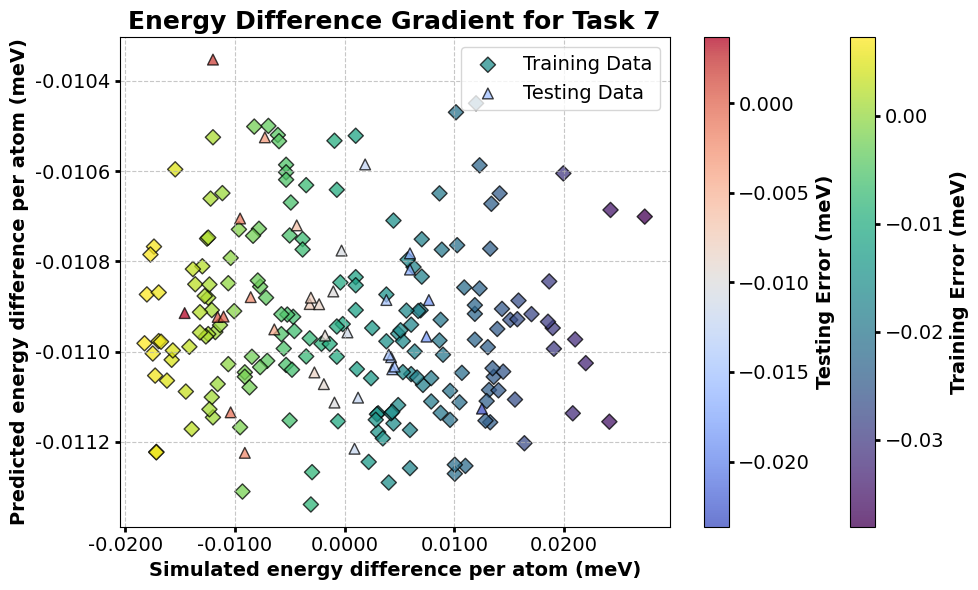

0.00053016946
-1.37143315e-05
1.1338794e-05


/tmp/ipykernel_3680772/59063057.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

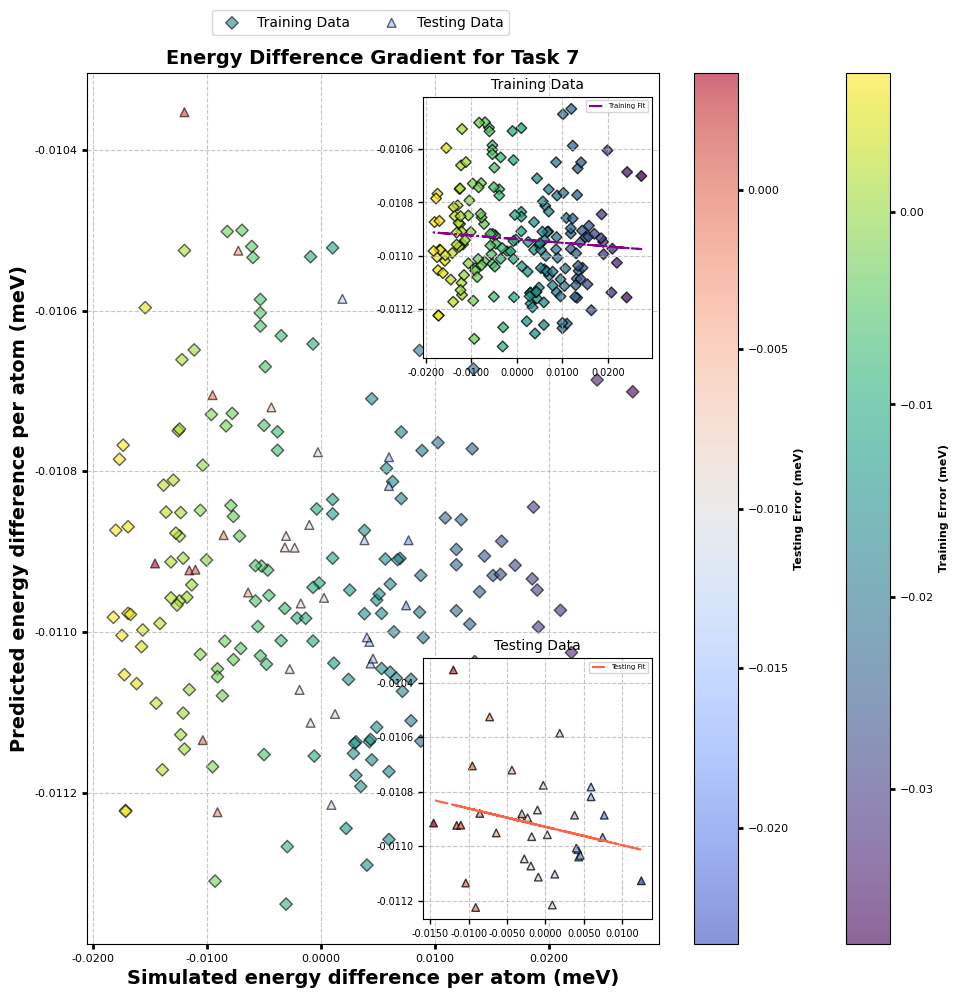

Training Task 16
Training Task 17
Training Task 18
Training Task 19


<Figure size 640x480 with 0 Axes>

In [16]:
datadim = 43264
embedim = 2 
training_cycles = 20
n_tasks = 25
lr = 1e-1
augmentation = True
########### NOT USING THE BELOW FOR THIS AS IT IS DEFAULT RUN ################
'''

reptile = 'Reptile'

model_mod = torch.nn.Sequential(
                            torch.nn.Linear(datadim,2048),
                            torch.nn.ReLU(),
                            # torch.nn.Linear(10240,2048),
                            # torch.nn.ReLU(),
                            torch.nn.Linear(2048,1024),
                            torch.nn.ReLU(),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            *(list(model_reptile.children())),)

'''
scaler = False


train_tasks, test_tasks = sequential_train_and_test_task(n_tasks,ind_to_val)
title = "Default Feature Extractor without scaling, Sequential tasks \n Reconstruction Graph"

results = single_model_training_and_validation(train_tasks,ind_to_val,image_mask,energy_to_ind,title,training_cycles=training_cycles,datadim=datadim,lr=lr,augmentation=augmentation)
np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Data_defaultFE_noScaling.npy",results)

### With Default Feature Extractor, Scaling

default_FE
Training Task 1
Training Task 2
Training Task 3
Training Task 4
Training Task 5
Training Task 6
Training Task 7
Training Task 8
Training Task 9
Training Task 10
Training Task 11
Training Task 12
Training Task 13
Training Task 14
Training Task 15
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


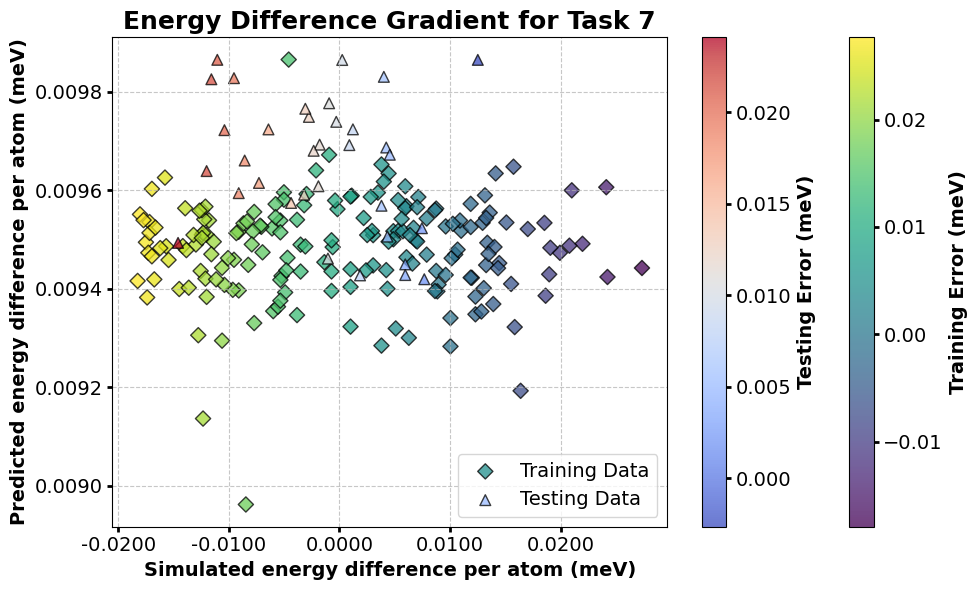

0.00065460184
1.2930922e-05


/tmp/ipykernel_3680772/1530638452.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

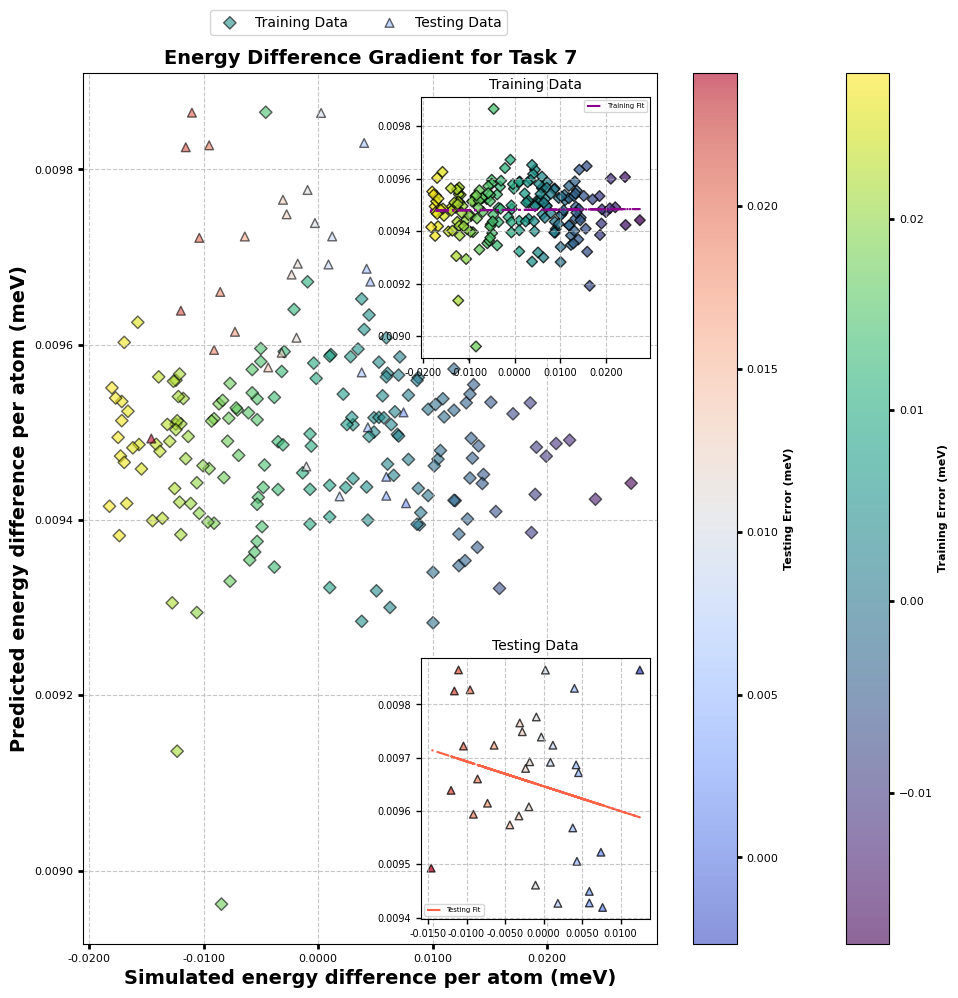

Training Task 16
Training Task 17
Training Task 18
Training Task 19


<Figure size 640x480 with 0 Axes>

In [21]:
datadim = 43264
embedim = 2 
training_cycles = 20
n_tasks = 25
lr = 1e-2
augmentation = True
########### NOT USING THE BELOW FOR THIS AS IT IS DEFAULT RUN ################
'''

reptile = 'Reptile'

model_mod = torch.nn.Sequential(
                            torch.nn.Linear(datadim,2048),
                            torch.nn.ReLU(),
                            # torch.nn.Linear(10240,2048),
                            # torch.nn.ReLU(),
                            torch.nn.Linear(2048,1024),
                            torch.nn.ReLU(),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            *(list(model_reptile.children())),)


'''
scaler = True

train_tasks, test_tasks = sequential_train_and_test_task(n_tasks,ind_to_val)
title = "Default Feature Extractor without scaling, Sequential tasks \n Reconstruction Graph"

results = single_model_training_and_validation(train_tasks,ind_to_val,image_mask,energy_to_ind,title,training_cycles=training_cycles,datadim=datadim,lr=lr,scaler=scaler)
#np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Data_defaultFE_withScaling.npy",results)

## Active Learning
1. Stability Acquisition
2. Uncertainty Acquisition

In [22]:
global fig
fig = None
from statistics import mean 
from processing import *

    
def plot_images_by_indices(images, indices, true_labels, iteration, task_id, exp_step, acquisition, cols=5):
    """Plot images corresponding to the specified indices."""
    num_images = len(images)
    rows = num_images // cols + (1 if num_images % cols else 0)

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, 5))

    for idx in range(num_images):
      img_ax = plt.subplot(rows, cols, idx+1)
      img_ax.imshow(images[idx][0].cpu().numpy())
      img_ax.set_title(f"Iteration: {iteration[indices[idx]]}",fontsize=30)
      img_ax.axis('off')

    '''
    scatter_ax = axs[cols-1]
    scatter_ax.set_title('Energy at Optimal Iteration Plot - Active Learning Exploration')
    scatter_ax.set_xlabel('Iteration')
    scatter_ax.set_ylabel('Energy')
    for index in indices:
      scatter_ax.scatter(iteration[index], true_labels[index], color='red', s=100, marker=f"${int(iteration[index])}$")  # Increase marker size with `s`
    '''
    plt.tight_layout()
    plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/AL_selected_Simulated_images/task{task_id+1}/selected_exp{exp_step}_with_{acquisition}acq_trajectory.png")
    plt.clf()

"""
def active_learning_single_tasks(task,image_mask,energy_to_ind,exploration_steps,acquisition):

    (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
                image_mask[task][0], energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.9, shuffle=False, random_state=2)

    datadim = 43264
    embedim = 2 
    num_iterations = exploration_steps
    num_samples_per_iteration = 1

    training_cycles = 20
    lr = 1e-1

    unlabeled_img = torch.tensor(copy.deepcopy(X_test),dtype=torch.float32)

    X_train = np.squeeze(X_train,axis=1)
    X_test = np.squeeze(X_test,axis=1)

    s1,s2,s3 = X_train.shape
    X_train = X_train.reshape(-1,s2*s3)
    X_test = X_test.reshape(-1,s2*s3)

    y_train = np.array(y_train).reshape(1,-1)
    y_test = np.array(y_test).reshape(1,-1)

    true_labels = energy_to_ind[task]['target_total_energy_per_atom'] 

    train_x = torch.tensor(X_train, dtype = torch.float32)
    train_y = torch.tensor(np.array(y_train), dtype = torch.float32)
    test_x = torch.tensor(X_test, dtype = torch.float32)
    test_y = torch.tensor(np.array(y_test), dtype = torch.float32)

    target_labels = torch.tensor(np.array(energy_to_ind[task]['target_total_energy_per_atom'][iterations_test.index]),dtype=torch.float32)

    iterations_train = torch.tensor(np.array(iterations_train),dtype=torch.float32)
    iterations_test = torch.tensor(np.array(iterations_test),dtype=torch.float32)

    print(f"True labels shape: {true_labels.shape}")
    print(f"True labels indices: {true_labels.index}")

    acquisiton_function = {
        "uncertainty": select_most_uncertain_samples,
        "stability" : select_most_stable_energy_samples,
    }

    selected_iter = []
    selected_energy = []
    training_loss = []
    model_mod = torch.nn.Sequential(
                                    torch.nn.Linear(datadim,2048),
                                    torch.nn.ReLU(),
                                    # torch.nn.Linear(10240,2048),
                                    # torch.nn.ReLU(),
                                    torch.nn.Linear(2048,1024),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(1024, 256),
                                    torch.nn.ReLU(),
                                    *(list(fcFeatureExtractor(256,embedim).children())),)

    dklgp = dklgpreg.dklGPR(datadim,embedim,hidden_dim=[1000,500,50],feature_extract=copy.deepcopy(model_mod),precision="single")#aoi.models.dklGPR(data_dim, embedim=2, precision="double")

    for iteration in range(num_iterations):

        print(f"Iteration {iteration+1}/{num_iterations}")
        
        dklgp.fit(train_x, train_y, training_cycles=training_cycles, lr=lr)

        training_loss.append(mean(list(dklgp.train_loss)))

        #most_uncertain_index = select_most_uncertain_samples(dklgp, test_x, num_samples=num_samples_per_iteration)
        most_uncertain_index = acquisiton_function[acquisition](dklgp, test_x, test_y, num_samples=num_samples_per_iteration, error_threshold=0.05)
        print(f"Most uncertain indices: {most_uncertain_index}")

        unlabelled_images = [unlabeled_img[i] for i in most_uncertain_index]

        selected_iter.append(iterations_test[most_uncertain_index.cpu().numpy()].cpu().numpy())
        selected_energy.append(target_labels[most_uncertain_index.cpu().numpy()].cpu().numpy())

        plot_images_by_indices(unlabelled_images, most_uncertain_index.cpu().numpy(), target_labels.cpu().numpy(), iterations_test.cpu().numpy(), task, iteration, acquisition, cols=num_samples_per_iteration)

        train_x = torch.cat((train_x, test_x[most_uncertain_index.item()][None]), 0)
        train_y = torch.cat((train_y, test_y[:,most_uncertain_index.item()].reshape(1,-1)), 1)
        
        test_x = torch.cat((test_x[:most_uncertain_index.item()], test_x[most_uncertain_index.item()+1:]), 0)
        test_y = torch.cat((test_y[:,:most_uncertain_index.item()].reshape(1,-1), test_y[:,most_uncertain_index.item()+1:].reshape(1,-1)), 1)
        
        unlabeled_img = torch.cat((unlabeled_img[:most_uncertain_index.item()], unlabeled_img[most_uncertain_index.item()+1:]), 0)
        target_labels = torch.cat((target_labels[:most_uncertain_index.item()], target_labels[most_uncertain_index.item()+1:]), 0)
        
        iterations_test = torch.cat((iterations_test[:most_uncertain_index.item()], iterations_test[most_uncertain_index.item()+1:]), 0)


        print(f"New data shape: {train_x.shape}")
        print(f"New data label: {train_y.shape}")
        torch.save(dklgp,f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/active_learning/task{task+1}/AL_exp{iteration}_with_{acquisition}_acq_model.pt")
    
    plot_selected_points(iterations_test,test_y,selected_iter,selected_energy,acquisition,task, num_iterations)

    return selected_energy, selected_iter, training_loss, iterations_test,test_y, acquisition,task, num_iterations
"""

'\ndef active_learning_single_tasks(task,image_mask,energy_to_ind,exploration_steps,acquisition):\n\n    (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(\n                image_mask[task][0], energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task][\'Iteration\'], test_size=0.9, shuffle=False, random_state=2)\n\n    datadim = 43264\n    embedim = 2 \n    num_iterations = exploration_steps\n    num_samples_per_iteration = 1\n\n    training_cycles = 20\n    lr = 1e-1\n\n    unlabeled_img = torch.tensor(copy.deepcopy(X_test),dtype=torch.float32)\n\n    X_train = np.squeeze(X_train,axis=1)\n    X_test = np.squeeze(X_test,axis=1)\n\n    s1,s2,s3 = X_train.shape\n    X_train = X_train.reshape(-1,s2*s3)\n    X_test = X_test.reshape(-1,s2*s3)\n\n    y_train = np.array(y_train).reshape(1,-1)\n    y_test = np.array(y_test).reshape(1,-1)\n\n    true_labels = energy_to_ind[task][\'target_total_energy_per_atom\'] \n\n    train_x = torch.tenso

Stability Acquisition

In [23]:
clear_gpu_cache()
torch.set_default_device("cuda:0")

In [117]:
def active_learning_single_tasks(task,image_mask,energy_to_ind,exploration_steps,acquisition):

    (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
                image_mask[task][0], energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.9, shuffle=False, random_state=12)

    datadim = 43264
    embedim = 2 
    num_iterations = exploration_steps
    num_samples_per_iteration = 1

    training_cycles = 20
    lr = 1e-1

    unlabeled_img = torch.tensor(copy.deepcopy(X_test),dtype=torch.float32)

    print("Unlabeled Image:",unlabeled_img.shape)
    X_train = np.squeeze(X_train,axis=1)
    X_test = np.squeeze(X_test,axis=1)

    s1,s2,s3 = X_train.shape
    X_train = X_train.reshape(-1,s2*s3)
    X_test = X_test.reshape(-1,s2*s3)

    y_train = np.array(y_train).reshape(1,-1)
    y_test = np.array(y_test).reshape(1,-1)

    true_labels = energy_to_ind[task]['target_total_energy_per_atom'] 

    train_x = torch.tensor(X_train, dtype = torch.float32)
    train_y = torch.tensor(np.array(y_train), dtype = torch.float32)
    test_x = torch.tensor(X_test, dtype = torch.float32)
    test_y = torch.tensor(np.array(y_test), dtype = torch.float32)

    target_labels = torch.tensor(np.array(energy_to_ind[task]['target_total_energy_per_atom'][iterations_test.index]),dtype=torch.float32)

    iterations_train = torch.tensor(np.array(iterations_train),dtype=torch.float32)
    iterations_test = torch.tensor(np.array(iterations_test),dtype=torch.float32)

    print(f"True labels shape: {true_labels.shape}")
    print(f"True labels indices: {true_labels.index}")

    acquisiton_function = {
        "uncertainty": select_most_uncertain_samples,
        "stability" : select_most_stable_energy_samples,
    }

    selected_iter = []
    selected_energy = []
    training_loss = []
    model_mod = torch.nn.Sequential(
                                    torch.nn.Linear(datadim,2048),
                                    torch.nn.ReLU(),
                                    # torch.nn.Linear(10240,2048),
                                    # torch.nn.ReLU(),
                                    torch.nn.Linear(2048,1024),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(1024, 256),
                                    torch.nn.ReLU(),
                                    *(list(fcFeatureExtractor(256,embedim).children())),)

    dklgp = dklgpreg.dklGPR(datadim,embedim,hidden_dim=[1000,500,50],feature_extract=copy.deepcopy(model_mod),precision="single")#aoi.models.dklGPR(data_dim, embedim=2, precision="double")
    mse_loss_training = []
    mse_loss_test = []
    rmse = torch.nn.MSELoss()
    for iteration in range(num_iterations):

        print(f"Iteration {iteration+1}/{num_iterations}")
        
        dklgp.fit(train_x, train_y, training_cycles=training_cycles, lr=lr)

        training_loss.append(mean(list(dklgp.train_loss)))

        #most_uncertain_index = select_most_uncertain_samples(dklgp, test_x, num_samples=num_samples_per_iteration)
        most_uncertain_index = acquisiton_function[acquisition](dklgp, test_x, test_y, num_samples=num_samples_per_iteration, error_threshold=0.5)
        print(f"Most uncertain indices: {most_uncertain_index}")
        pred_train = torch.tensor(dklgp.predict(train_x)[0])
        pred_test = torch.tensor(dklgp.predict(test_x)[0])
        
        train_loss = torch.sqrt(rmse(pred_train.reshape(-1,),train_y.reshape(-1,))).item()
        test_loss = torch.sqrt(rmse(pred_test.reshape(-1,),test_y.reshape(-1,))).item()
        print(most_uncertain_index)
        print(unlabeled_img.shape)
        unlabelled_images = [unlabeled_img[i] for i in most_uncertain_index]

        selected_iter.append(iterations_test[most_uncertain_index.cpu().numpy()].cpu().numpy())
        selected_energy.append(target_labels[most_uncertain_index.cpu().numpy()].cpu().numpy())

        plot_images_by_indices(unlabelled_images, most_uncertain_index.cpu().numpy(), target_labels.cpu().numpy(), iterations_test.cpu().numpy(), task, iteration, acquisition, cols=num_samples_per_iteration)

        train_x = torch.cat((train_x, test_x[most_uncertain_index.item()][None]), 0)
        train_y = torch.cat((train_y, test_y[:,most_uncertain_index.item()].reshape(1,-1)), 1)
        
        test_x = torch.cat((test_x[:most_uncertain_index.item()], test_x[most_uncertain_index.item()+1:]), 0)
        test_y = torch.cat((test_y[:,:most_uncertain_index.item()].reshape(1,-1), test_y[:,most_uncertain_index.item()+1:].reshape(1,-1)), 1)
        
        unlabeled_img = torch.cat((unlabeled_img[:most_uncertain_index.item()], unlabeled_img[most_uncertain_index.item()+1:]), 0)
        target_labels = torch.cat((target_labels[:most_uncertain_index.item()], target_labels[most_uncertain_index.item()+1:]), 0)
        
        iterations_test = torch.cat((iterations_test[:most_uncertain_index.item()], iterations_test[most_uncertain_index.item()+1:]), 0)
        
        
        mse_loss_training.append(train_loss)
        mse_loss_test.append(test_loss)

        print(f"New data shape: {train_x.shape}")
        print(f"New data label: {train_y.shape}")
        torch.save(dklgp,f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/active_learning/task{task+1}/AL_exp{iteration}_with_{acquisition}_acq_model.pt")
    
    #plot_selected_points(iterations_test,test_y,selected_iter,selected_energy,acquisition,task,num_iterations)
    # mod_plot_selected_points(iterations_test, test_y, selected_iter, selected_energy, acquisition, task, num_iterations)
    
    #Plot Training Loss
    # mod_plot_al_training_loss(training_loss,task,num_iterations,acquisition)

    print("Train MSE:",np.mean(mse_loss_training)/1e-3)
    print("Test MSE:",np.mean(mse_loss_test)/1e-3)
    
    return selected_energy, selected_iter, training_loss, iterations_test,test_y, acquisition,task, num_iterations

In [118]:
n_tasks = 25
exploration_steps = 10
acquisition = "uncertainty"
train_tasks, test_tasks = sequential_train_and_test_task(n_tasks, ind_to_val)
total_tasks = train_tasks+test_tasks
print(total_tasks)
results = {int(ind_to_val[task])-1:[] for task in total_tasks}
for task in total_tasks:
    task_num = int(ind_to_val[task])-1
    print(task_num)
    results[task_num] = active_learning_single_tasks(task_num,image_mask,energy_to_ind,exploration_steps,acquisition)
    clear_gpu_cache()
    break
np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Active_learning_data_uncertainty_25tasks.npy",results)

[21, 15, 23, 17, 0, 6, 11, 12, 18, 10, 24, 13, 9, 3, 7, 19, 14, 16, 5, 2, 22, 8, 4, 20, 1]
0
Unlabeled Image: torch.Size([206, 1, 208, 208])
True labels shape: (228,)
True labels indices: RangeIndex(start=0, stop=228, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([100])
tensor([100])
torch.Size([206, 1, 208, 208])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([155])
tensor([155])
torch.Size([205, 1, 208, 208])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])


Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([191])
tensor([191])
torch.Size([204, 1, 208, 208])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([185])
tensor([185])
torch.Size([203, 1, 208, 208])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([26])
tensor([26])
torch.Size([202, 1, 208, 208])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([139])
tensor([139])
torch.Size([201, 1, 208, 208])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([164])
tensor([164])
torch.Size([200, 1, 208, 208])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([54])
tensor([54])
torch.Size([199, 1, 208, 208])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([168])
tensor([168])
torch.Size([198, 1, 208, 208])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([142])
tensor([142])
torch.Size([197, 1, 208, 208])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Train MSE: 0.42906510934699327
Test MSE: 0.39364201948046684


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [143]:
n_tasks = 25
exploration_steps = 10
acquisition = "stability"
train_tasks, test_tasks = sequential_train_and_test_task(n_tasks, ind_to_val)
total_tasks = train_tasks+test_tasks
print(total_tasks)
results = {int(ind_to_val[task])-1:[] for task in total_tasks}
for task in total_tasks:
    task_num = int(ind_to_val[task])-1
    print(task_num)
    results[task_num] = active_learning_single_tasks(task_num,image_mask,energy_to_ind,exploration_steps,acquisition)
    clear_gpu_cache()
    break
#np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Active_learning_data_uncertainty_25tasks.npy",results)

[21, 15, 23, 17, 0, 6, 11, 12, 18, 10, 24, 13, 9, 3, 7, 19, 14, 16, 5, 2, 22, 8, 4, 20, 1]
0
Unlabeled Image: torch.Size([206, 1, 208, 208])
True labels shape: (228,)
True labels indices: RangeIndex(start=0, stop=228, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([125], device='cpu')
tensor([125], device='cpu')
torch.Size([206, 1, 208, 208])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])


Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([80], device='cpu')
tensor([80], device='cpu')
torch.Size([205, 1, 208, 208])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([79], device='cpu')
tensor([79], device='cpu')
torch.Size([204, 1, 208, 208])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([78], device='cpu')
tensor([78], device='cpu')
torch.Size([203, 1, 208, 208])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([77], device='cpu')
tensor([77], device='cpu')
torch.Size([202, 1, 208, 208])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([76], device='cpu')
tensor([76], device='cpu')
torch.Size([201, 1, 208, 208])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([75], device='cpu')
tensor([75], device='cpu')
torch.Size([200, 1, 208, 208])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([75], device='cpu')
tensor([75], device='cpu')
torch.Size([199, 1, 208, 208])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([74], device='cpu')
tensor([74], device='cpu')
torch.Size([198, 1, 208, 208])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([74], device='cpu')
tensor([74], device='cpu')
torch.Size([197, 1, 208, 208])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Train MSE: 0.8198308816645294
Test MSE: 0.3463353772531263


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [80]:
clear_gpu_cache()